In [ ]:
!pip install pydicom

In [1]:
import numpy as np
import pandas as pd
import os
import pydicom
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models, transforms
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from tools import prepare_data, read_dicom_series
from pathlib import Path

2024-07-25 16:41:48.550695: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-25 16:41:48.558627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 16:41:48.567717: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 16:41:48.570325: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-25 16:41:48.578076: I tensorflow/core/platform/cpu_feature_guar

## PreProcess

In [7]:
MAIN_PATH = './data/iaaa/data/'
LABEL_PATH = './data/iaaa/train.csv'
SAVE_PATH = './data/iaaa/processed/'

ROOT_DATA_DIR = Path(MAIN_PATH).expanduser().absolute()
DATA_DIR = ROOT_DATA_DIR / 'data'
PREPARED_DIR = Path(SAVE_PATH).expanduser().absolute()

In [ ]:
labels = pd.read_csv(LABEL_PATH)

for uid in labels.SeriesInstanceUID:
    os.path.join(*other)

In [12]:
series_folder = [os.path.join(MAIN_PATH, uid) for uid in labels.SeriesInstanceUID]

images = []
for path in series_folder[:5]:
    image = read_dicom_series(study_path=path)
    images.append(image)

In [ ]:
expected_num_slices = 16
target_h = 256
target_w = 256

prepare_data(labels.iloc[:], data_dir=DATA_DIR, prepared_data_dir=PREPARED_DIR, split='training',
             target_h= target_h, target_w=target_w, expected_num_slices=expected_num_slices)

In [100]:
def read_dicom_files(patient_folder):
    dicom_files = [os.path.join(patient_folder, f) for f in os.listdir(patient_folder) if f.endswith('.dcm')]
    # dicom_images = [0] * len(dicom_files)
    dicom_images = list()
    for file in dicom_files:
        dicom = pydicom.dcmread(file)
        ProtocolName = dicom.ProtocolName,
        # print(ProtocolName)
        PatientID = dicom.PatientID,
        # InstanceNumber = dicom.InstanceNumber
        # print(dicom_files)
        slice_number = dicom.InstanceNumber
        # dicom_images[slice_number-1] = dicom

        dicom_images.append(dicom)

    sorted_dicom_images = sorted(dicom_images, key=lambda d: d.InstanceNumber)

    images = []
    for i in sorted_dicom_images:
        images.append(i.pixel_array)

    return np.array(images), ProtocolName, PatientID


def main(main_path, label_path, save_path):

    labels_df = pd.read_csv(label_path)
    labels_dict = pd.Series(labels_df.prediction.values, index=labels_df.SeriesInstanceUID).to_dict()
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    for patient_id in os.listdir(main_path)[:]:
        patient_folder = os.path.join(main_path, patient_id)
        if os.path.isdir(patient_folder):
            dicom_images, ProtocolName, PatientID = read_dicom_files(patient_folder)
            # print(ProtocolName[0])

            if patient_id in labels_dict:
                label = labels_dict[patient_id]
                if ProtocolName[0] == 'T1W_SE CLEAR':
                    save_sub_path = os.path.join(save_path, 'T1')
                if ProtocolName[0] == 'T2W_TSE SENSE':
                    save_sub_path = os.path.join(save_path, 'T2')
                if ProtocolName[0] == 'T2W_FLAIR SENSE':
                    save_sub_path = os.path.join(save_path, 'FLAIR')

                save_file_path = os.path.join(save_sub_path, f'{patient_id}.npz')

                np.savez(save_file_path, x=dicom_images, y=label, patient_id = PatientID)
                print(f'Saved {save_file_path}')
            else:
                print(f'Label for patient {patient_id} not found.')

In [ ]:
T2W_FLAIR SENSE
T2W_TSE SENSE
T1W_SE CLEAR

In [101]:
main(MAIN_PATH, LABEL_PATH, SAVE_PATH)

Saved ./data/iaaa/processed/T2/1.3.46.670589.11.10042.5.0.1412.2024020313391873234.npz
Saved ./data/iaaa/processed/T1/1.3.46.670589.11.10042.5.0.1412.2024020313401387235.npz
Saved ./data/iaaa/processed/FLAIR/1.3.46.670589.11.10042.5.0.1412.2024020313411395266.npz
Saved ./data/iaaa/processed/T2/1.3.46.670589.11.10042.5.0.1412.2024020321541276410.npz
Saved ./data/iaaa/processed/T1/1.3.46.670589.11.10042.5.0.1412.2024020321545257411.npz
Saved ./data/iaaa/processed/FLAIR/1.3.46.670589.11.10042.5.0.1412.2024020321562478444.npz
Saved ./data/iaaa/processed/T2/1.3.46.670589.11.10042.5.0.1412.2024020322020585568.npz
Saved ./data/iaaa/processed/T1/1.3.46.670589.11.10042.5.0.1412.2024020322024573569.npz
Saved ./data/iaaa/processed/FLAIR/1.3.46.670589.11.10042.5.0.1412.2024020322041790602.npz
Saved ./data/iaaa/processed/T2/1.3.46.670589.11.10042.5.0.1412.2024020322113060815.npz
Saved ./data/iaaa/processed/T1/1.3.46.670589.11.10042.5.0.1412.2024020322121045816.npz
Saved ./data/iaaa/processed/FLAIR/

In [59]:
data = np.load('./data/iaaa/processed/1.3.46.670589.11.10042.5.0.1412.2024020321562478444.npz')
meta = data['y']

meta

array(0)

(16, 288, 288)


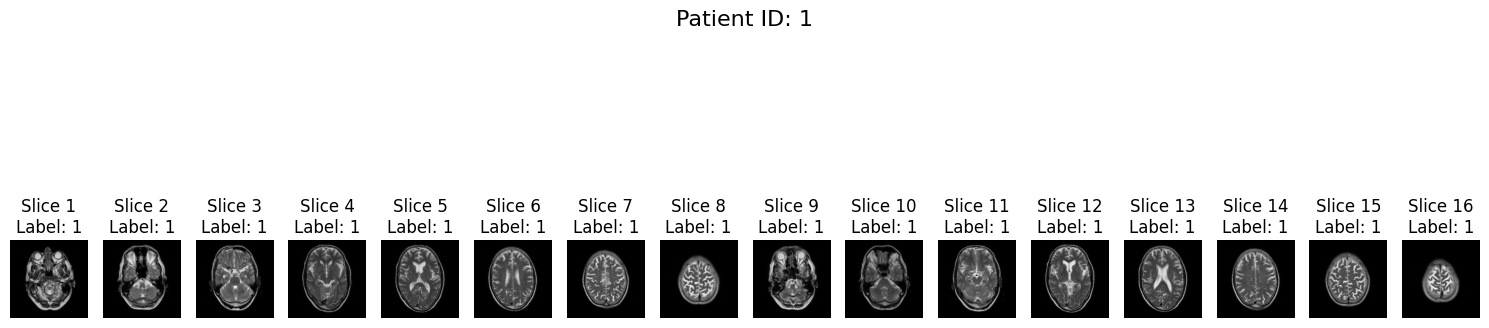

(16, 288, 288)


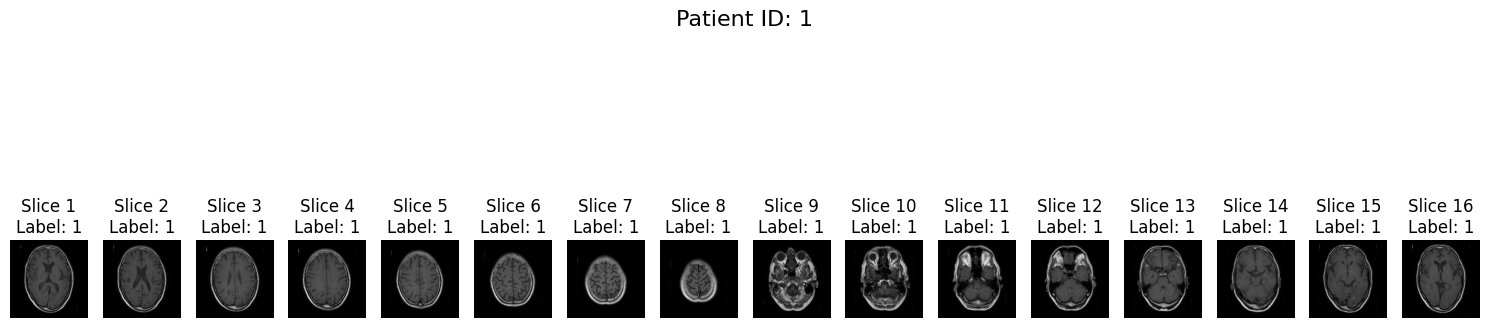

(16, 288, 288)


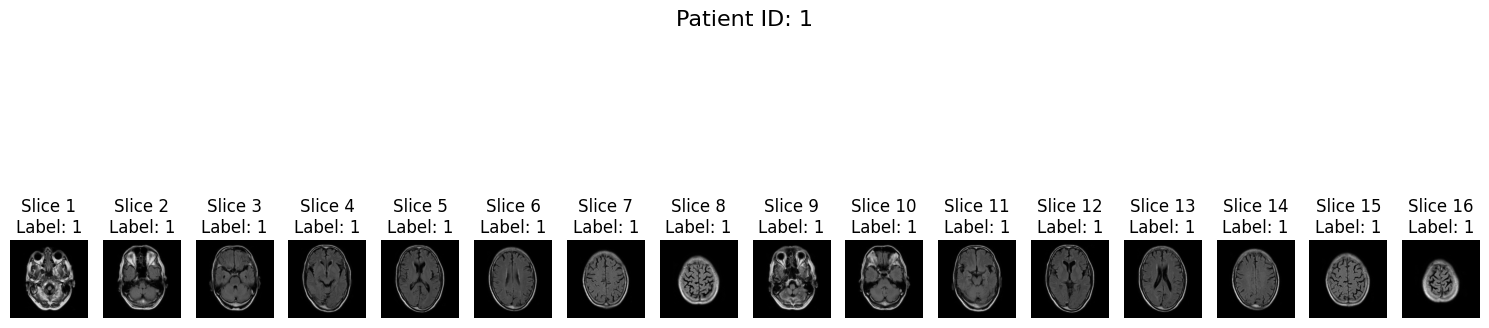

(18, 288, 288)


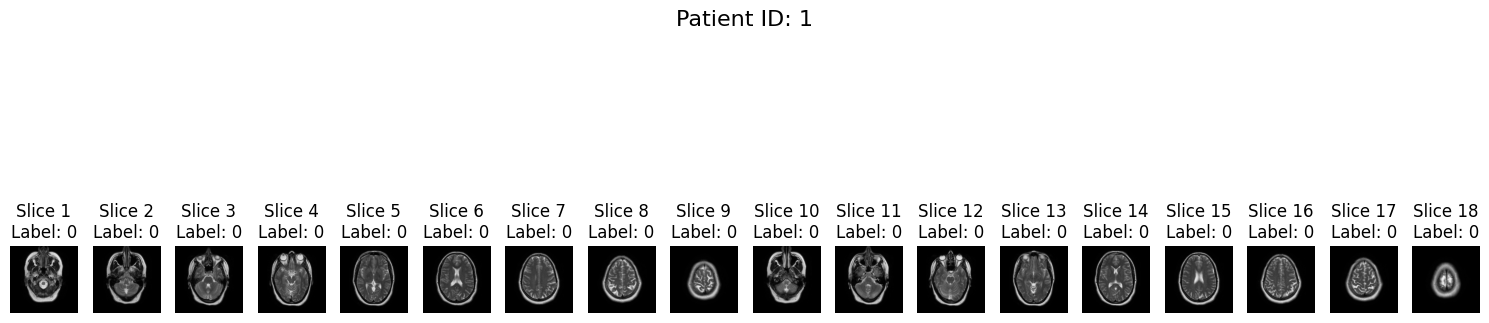

(18, 288, 288)


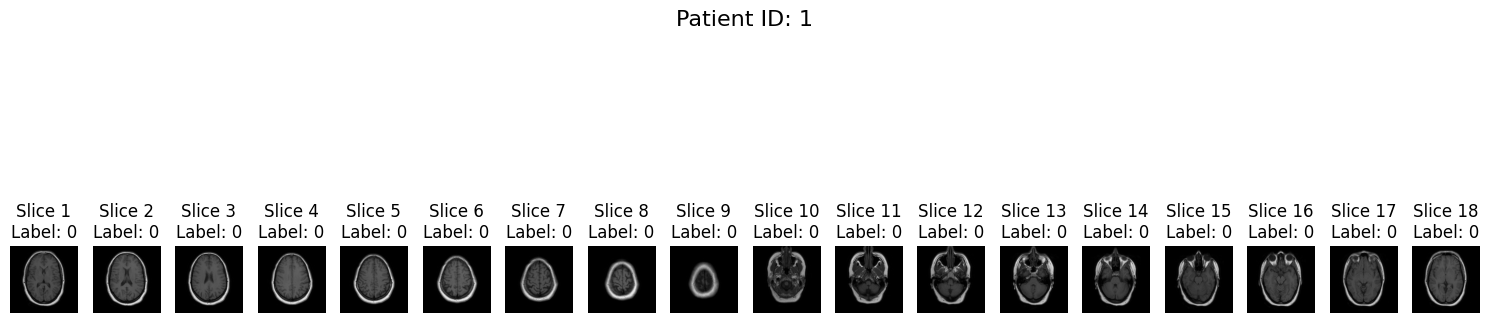

In [38]:
def plot_slices(npz_folder_path):

    for npz_file in os.listdir(npz_folder_path)[:5]:
        if npz_file.endswith('.npz'):
            npz_file_path = os.path.join(npz_folder_path, npz_file)
            data = np.load(npz_file_path)
            dicom_images = data['x']
            print(dicom_images.shape)
            label = data['y']

            fig, axes = plt.subplots(nrows=1, ncols=len(dicom_images), figsize=(15, 5))
            fig.suptitle(f'Patient ID: {npz_file.split(".")[0]}', fontsize=16)

            for i, dicom_image in enumerate(dicom_images):
                if len(dicom_images) == 1:
                    ax = axes
                else:
                    ax = axes[i]

                ax.imshow(dicom_image, cmap='gray')
                ax.set_title(f'Slice {i+1}\nLabel: {label}')
                ax.axis('off')

            plt.tight_layout()
            plt.subplots_adjust(top=0.85)
            plt.show()

if __name__ == "__main__":
    NPZ_FOLDER_PATH = './data/iaaa/iaaa_processed/'
    plot_slices(NPZ_FOLDER_PATH)


## Model Training

In [ ]:
for batch_idx, (images, label) in enumerate(dataloader):
    print(f'Batch {batch_idx + 1}:')
    print(f'Label: {label.item()}')
    print(f'Number of slices: {images.shape[1]}')
    break  # Remove this to iterate over the entire dataset

In [ ]:
# class Resize3D:
#     def __init__(self, size):
#         self.size = size

#     def __call__(self, img):
#         img = img.unsqueeze(0)  # Add batch dimension
#         img = F.interpolate(img, size=self.size, mode='trilinear', align_corners=False)
#         img = img.squeeze(0)  # Remove batch dimension
#         return img

class ToTensor3D:
    def __call__(self, img):
        img = torch.tensor(img, dtype=torch.float32)
        if img.ndim == 3:  # If (depth, height, width)
            img = img.unsqueeze(0)  # Add channel dimension
        return img

class FlattenDepthIntoChannels:
    def __call__(self, img):
        img = img.permute(1, 0, 2, 3)  # Change from (1, depth, height, width) to (depth, 1, height, width)
        img = img.view(-1, img.size(2), img.size(3))  # Flatten depth into channels (depth, height, width)
        return img

# Define transformations
transform = transforms.Compose([
    # ToTensor3D(),
    transforms.Resize((224, 224)),
    # FlattenDepthIntoChannels(),
    transforms.Normalize(mean=[0.485], std=[0.229]),
])


class MRIDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = self._get_image_paths()
    
    def _get_image_paths(self):
        image_paths = []
        for main_folder in os.listdir(self.image_dir):
            sub_folder = os.path.join(self.image_dir, main_folder)
            if os.path.isdir(sub_folder):
                for folder in os.listdir(sub_folder):
                    anat_folder = os.path.join(sub_folder, folder, 'anat')
                    if os.path.isdir(anat_folder):
                        for file in os.listdir(anat_folder):
                            if file.endswith('.gz'):
                                image_paths.append(os.path.join(anat_folder, file))
        return image_paths
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        gz_path = self.image_paths[idx]
        with gzip.open(gz_path, 'rb') as f_in:
            with tempfile.NamedTemporaryFile(delete=False, suffix='.nii') as f_out:
                f_out.write(f_in.read())
                temp_path = f_out.name
        
        img = nib.load(temp_path)
        img_data = img.get_fdata()
        
        os.remove(temp_path)
        
        if self.transform:
            img_data = self.transform(img_data)
        
        label = 1 if 'schizophrenia' in gz_path else 0
        
        return img_data, label